<a href="https://colab.research.google.com/github/kooll/25t2/blob/main/book/ch05_translated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章 エラー、ログ、デバッグ

この章では、コードをより堅牢にするためのいくつかの手法を紹介します。堅牢性は、良いコードを書くための原則の一つです。まず、コード内でエラーを処理する方法について説明し、何か問題が発生してもコードが予測可能に動作するようにします。次に、コードが何をしているかを記録することによって情報を保存する方法を紹介します。これにより、他の人がコードを考察しやすくなるだけでなく、予期しないエラーが発生した際にも役立ちます。最後に、デバッグについて説明します。これはコードの問題の原因を追跡する方法です。効率的なデバッグのための戦略とツールについて解説します。

## Python のエラー

エラーとは、プログラムが完了すべきすべてのタスクを完了する前に、コードが予期せず停止することです。コードか停止することは、場合によっては望む結果かもしれませんが、別の動き、コードが実行を続けることを望ましいこともあります。これがエラーを処理するということです。コードは予測される事象に対して予測可能であるべきであり、これによりコードは堅牢になります。

このセクションでは、Pythonのエラーメッセージの読み方、それに対処する方法、そして独自のエラーを発生させる方法について説明します。

## Pythonエラーメッセージを読む

Pythonのエラーメッセージは難解に見えるかもしれませんが、有用な情報が詰まっています。エラーには2種類あり、構文エラー(Syntax Error)と例外 (Exception) があります。構文エラーは、完全に正しいPythonの文法で記述されていないコードを書いたときに発生します。

たとえば、かっこを閉じ忘れたり、関数内で忘れたりすることです。

これらはPythonインタープリタによって正しく解析されないため、コードが停止し、エラーを返します。

例外(Exception) には他のすべてのエラーが含まれます。例えば、関数への入力が欠けている場合や、辞書内に存在しないキーの値を探そうとする場合などです。

次の例では、Pythonのエラーメッセージの解釈方法を示すために、意図的にエラーを生成します。以下は、前に見たトレンドラインのコードです：

関数定義は以下のようにします：

In [ ]:
from scipy.stats import linregress

def fit_trendline(year_timestamps):
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    return slope, r_squared

この関数をリスト1個を引数として呼び出すとエラーが起きます。

In [ ]:
fit_trendline([2000, 2001,2002])

NameError: name 'data' is not defined

上記には、次の情報が含まれています。
1. エラーの原因となっているコードの行
2. エラーの種類とその修正方法の提案



Pythonのエラーはトレースバックとして表示されます。これらはエラーを引き起こした呼び出されたすべての関数を示しています。時にはPythonの内部の詳細や使用しているライブラリの情報が含まれており、少し圧倒されるように見えることもありますが、それらにはエラーの原因を特定するのに役立つ多くの有益な情報が含まれています。

Pythonのエラーメッセージに対処するための良い戦略は、メッセージの最後から始めることです。最後の行には、どのタイプのエラーに直面しているか（例えば、NameError）と、Pythonがそれを修正するために役立てると思っている情報が記載されています。エラーのタイプの詳細の上には、

エラーが発生すると、エラーを引き起こした行を示す矢印付きでコードが表示されます。これは問題を探すための良い出発点ですが、この例が示すように、実際の問題は前の行にあることがあります。

モジュールをインポートした際にもエラーが発生することがあります。たとえば、インポートした関数に間違ったタイプの入力を与えた場合です。このようなエラーは混乱を招きやすいです。というのも、エラーが発生した自分のコード行だけでなく、インポートされた関数内の行や、呼び出された他の関数もエラーメッセージに含まれるからです。エラーメッセージが非常に長い場合でも、同じ方法が使えます。つまり、最後から始めて後ろ向きに問題を解決することを試みます。

（注釈、ノート）
Pythonのエラーメッセージは、最近のバージョンで大幅に改善されました。新しいバージョンでは、メッセージがより読みやすく、情報量も豊富になっています。特にシンタックスエラーについては、多くの場合、前の行ではなく、コード内の正しい場所を指し示すようになっています。可能であれば、最新のPythonバージョンにアップグレードすることをお勧めします。

## エラー処理

多くの場合、エラーが発生したときにコードが停止することを避けるべきです。これは、他の関数があなたの関数の結果に依存している場合に特に重要です。あなたの関数がエラーを発生させると、大きなシステム内でエラーの連鎖を引き起こす可能性があります。このような場合には、コードが予測可能な動作をするようにエラーを「処理」するべきです。

Pythonは、キーワードtry と exceptを エラー処理に使用します。
try  と except は、次の2つのコードブロックの形を取ります：

```python
try:
    # some code that you want to run
except KeyError:
    # what you want to happen instead
    # if an error of this type is raised
```

try の下のブロックには、エラーになるかもしれないが、望む動作をするコードを書きます。

キーワード except の後には、特定の種類のエラー、例えばこの場合はKeyErrorが発生した際ときの処理を書きます。
例えば、辞書内であるキーに対応する値を検索するコードがあるとします。もしそのキーが辞書に存在しない場合、エラーでコードを停止させる代わりに、デフォルト値を返すことがあります。

except を複数回使い、複数のコードブロックをコードを書くこともできます。

1つのexceptブロックで複数の種類のエラーを処理することもできます。たとえば、次の構文を使用します:
```python
except (KeyError, ValueError): .
```

except ブロックの後に、else ブロックを書くことができます。これは、エラーが発生しなかった場合に実行されるコードになります。

Pythonのエラー処理には、もう一つ、 finally ブロックも使用できます。ブロックです。

finally ブロックは、エラーが発生するかどうかにかかわらず、実行されるブロックで、try, except, else の後に書きます。

finally ブロックは、リソースを解放するために使用されます。例えば、開いたファイルを閉じることなどです。図5-1にこのフローが示されています。エラー処理の詳細については、Python のドキュメンテーションを読んでください。


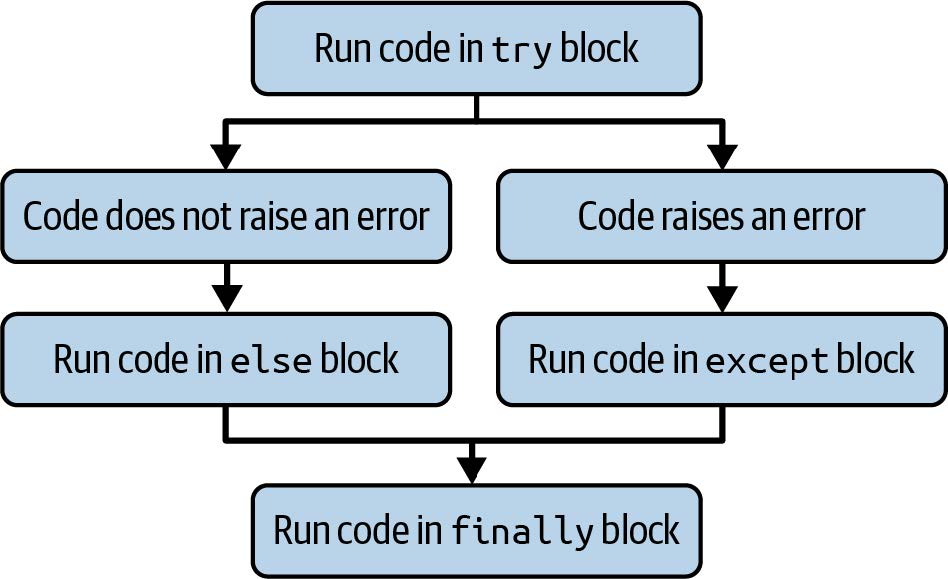

図5-1. try、except、else、およびfinallyブロックの実行順序

エラー処理の例を、trendline 関数を使って示します。

In [1]:
from scipy.stats import linregress

def fit_trendline(year_timestamps, data):
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    return slope, r_squared

いくつかの誤った入力を使って実行し、例外を発生させます。

In [2]:
timestamps = ["2000", "2001", "2002"]
data = [18.36, 18.36, 17.91]

fit_trendline(timestamps, data)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

両方のリストが浮動小数点数または整数で構成されている必要があるため、これは「a」を与えます。

エラーを処理する方法を見つけて、そのコードがエラーを起こさずに実行されるようにできます。

try文、except文、ブロックを使用する際のエラーに対処する方法は以下の通りです。

In [4]:
def fit_trendline(year_timestamps, data):
    try:
        result = linregress(year_timestamps, data)
    except TypeError:
        print(f"Both lists must contain only float or integers, got {data.dtype} and {year_timestamps.dtype}")
    else:
        slope = round(result.slope, 3)
        r_squared = round(result.rvalue**2, 3)
        return slope, r_squared

```

このコードでは、tryブロック内で例外が発生した場合、対応するexceptブロックが実行されます。elseブロックは例外が発生しなかった場合のみ実行され、finallyブロックは例外発生の有無に関わらず必ず実行されます。

In [5]:
timestamps = ["2000", "2001", "2002"]
data = [18.36, 18.36, 17.91]

fit_trendline(timestamps, data)

AttributeError: 'list' object has no attribute 'dtype'

エラーが発生した場合、コードはメッセージを出力します。

エラーメッセージは、情報が豊富で読みやすいことが重要です。良いエラーメッセージは、何が問題だったのか、どのコード部分でエラーが発生したのかについて明確な指針を提供することで、あなたやコードに携わる他の人の時間を大幅に節約できます。エラーメッセージは問題の内容を説明するべきであり、理想的にはそれを修正するために何をすべきかも示すべきです。

ブロック内でデフォルト値を返すこともできます。それは良い方法です。

この関数が成功した場合に返すのと同じフォーマットでこれを保持するというアイデアです。これにより、あなたの関数のインターフェースが一貫性を持ちます。この関数が特定のタイプの回答を返すことに依存している他のコードがある場合でも、この関数がエラーに遭遇したかどうかに関わらず、そのコードは正常に動作します。

In [6]:
def fit_trendline(year_timestamps, data):
    try:
        result = linregress(year_timestamps, data)
    except TypeError:
        print("Both lists must contain floats or integers.")
        return 0.0, 0.0
    else:
        slope = round(result.slope, 3)
        r_squared = round(result.rvalue**2, 3)
        return slope, r_squared


In [15]:
timestamps = ["2000", "2001", "2002"]
data = [18.36, 18.36, 17.91]

fit_trendline(timestamps, data)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

この関数は、エラーが発生してもしなくても、2つの浮動小数点数のタプルを返します。

この本について考えていた時、私は初めてデータサイエンスの仕事に就く前に書いたコードを見てみました。このコードはエラーをどのように処理すべきでないかを示しています。
```python
except:
    return
```

お願いです、これをしないでください！このコードは遭遇したすべてのエラーを黙らせてしまい、関数が動作しなかったことに気づかなくなります。誤った入力を受け取った場合でも、関数が予測可能に動作する方がはるかに良いです。

## エラーを起こす(raise)

状況によっては、予期しないことが起きたときにエラーを発生させたいことがあるかもしれません。この場合、あなたの関数に依存しているコードも停止させたいと考えるかもしれません。

Pythonで通常エラーが発生しない場合でもエラーを発生させ、そのエラーをカスタマイズできるキーワードは`raise`です。`raise`を使用することで、特定の条件に基づいてカスタムの例外を投げることができます。

この次の例では、入力のいずれかが空のリストかを確認し、空の場合は、エラーを起こします。

In [8]:
from scipy.stats import linregress

def fit_trendline(year_timestamps, data):
    if not year_timestamps or not data:
        raise ValueError("Timestamps and data cannot be empty lists")
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    return slope, r_squared

カスタムエラーメッセージを提供するには、次の構文を使用できます。
```python
raise{error}('Message')
```

この関数を空のリストで実行できます：

In [9]:
fit_trendline([],[18.36,18.36,17.91])

ValueError: Timestamps and data cannot be empty lists

それは、カスタムエラーメッセージを含む次の結果を返します。

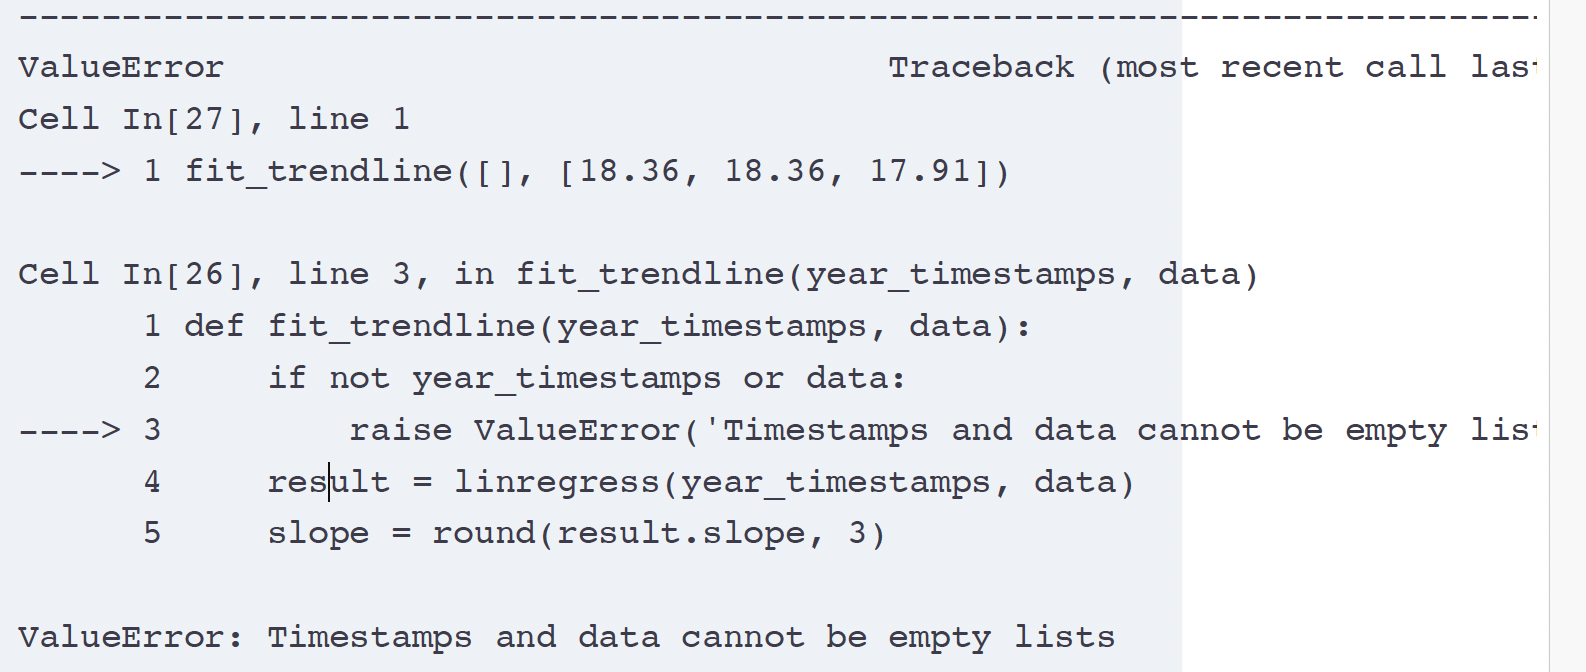

エラーメッセージはそれを読む人にとって有益であるべきであり、これはコードを読みやすくするための一部です。「エラーが発生しました」というメッセージは役に立ちません。

こちらは、私が執筆中に出会った有用なエラーメッセージの例です。

"UsageError: Cell magic `%%lprun` not found (But line magic `%lprun` existdid you mean that instead?)."

「UsageError: セルマジック `%%lprun` が見つかりません（ただし、行マジック `%lprun` が存在します。代わりにそれを意味しましたか？）」

それは何が間違っているか、そしてその間違いを修正するために何をすべきかを教えてくれました。

Pythonの組み込みエラーが要件を満たさない場合、カスタムエラーを定義することもできます。これは、大規模なプロジェクトにおいても良いプラクティスです。なぜなら、エラーにカスタム名を付けることで、コードのユーザーがエラーの発生源を簡単に特定できるからです。新しいエラーを定義する形式は次のとおりです。

```python
class NewException(Exception):
```

これは、新しいエラークラスが継承する例です。

クラス。カスタムクラスの定義について詳しくは、こちらをご覧ください。

カスタムエラーを使用することで、コードの読みやすさと保守性が向上します。エラーが明確に定義されていると、コードの他の部分が特定のエラーを適切に処理できるようになります。これにより、コードベースの異なる部分から発生したエラーが混ざり合うことを防ぎます。このようなエラーハンドリングの詳細なレベルにより、予期しない影響を防ぐことができ、デバッグやトラブルシューティングも効率的になります。

## ロギング　Logging

ロギングは、コードが実行中に何をしたかを別のファイルに記録する方法です。これにより、コードが他の人に対して実行状況を伝えることができ、他の人がコードを理解するのに役立ちます。また、問題が発生した場合に何が起こったのかを記録として残すことで、コードの可読性や堅牢性を高めることができます。

ロギングは、コードが何をしたかの記録を保存することを可能にします。これはメッセージを出力するだけの単純なプリントアウトとは異なり、検索可能な別のファイルに情報を保存することができます。これは特に、長時間実行されるプロセスや本番環境にデプロイされたコードにとって便利です。こうした状況では、何が起こっているのか、または何が問題になっているのかを確認するためにコードを停止したくありません。

ここではロギングの基本的な紹介を行いますが、詳細に関してはPythonのドキュメントを参照することをお勧めします。

### 何を記録する（ログする）か

Pythonのlogging モジュールでは、任意のメッセージを記録することができます。

記録すべき有用な情報は、具体的なユースケースやプロジェクトによって異なりますが、以下のものが考えられます：

*. 長時間実行されるタスクが開始されたか完了したことをお知らせします。

1. 長時間実行されるタスクが開始されたか完了したことをお知らせします。
1. 本番システムで何が問題になったのかを把握するためのエラーメッセージ
1. どの関数が他の関数を呼び出したか
1. 関数の入力と出力
1. いくつかのデータが保存されているファイルパス

ロギングは、本番システムや長期間実行されるタスクのデバッグに非常に役立ちます。このことについては「デバッグ」でさらに詳しく説明します。

ログは、コードが意図した通りに動作した証拠としても役立ちます。これがプロジェクトにとって有用である場合、タスクが実行されたこととその結果を示すログメッセージを含めてください。例えば、機械学習モデルのトレーニングが終了した際の精度をログに記録することが考えられます。

良い戦略は、ログを少なめに記録するのではなく、多めに記録するように心がけることです。メッセージが標準化された方法で構造化されているか、特定のキーワードを含んでいる場合、ログファイルを検索して簡単に必要な情報を見つけることができます。また、ログメッセージでは具体的に記述することも重要です。

"started saving file" というメッセージは役に立ちません。ファイルの内容やファイル名は何ですか？

このような場合、次の形式付き文字列、f文字列が便利です。
```python
f"Saving {variable_name} data to {file_name}"
```

次のセクションでは、Pythonモジュールを使用してメッセージをログに記録する方法について説明します。

## ログ設定

Python標準ライブラリの logging モジュールは大きく, 機能豊富です。

ただし、必要なのはその中の関数の小さなサブセットのみです。このライブラリは、ログしたメッセージを別ファイルに保存する機能を持っているため、保存方法について心配する必要はありません。ただし、いくつかの設定が必要です。

記録されるログの最初に考慮すべき設定は、ログの深刻度レベルです。Pythonのloggingモジュールには、

5つの主要なログレベルがあります。それぞれのレベルは、ログメッセージの緊急度を示します。

1. **DEBUG（デバッグ）**: 詳細な情報を記録します。通常、問題を診断するために使用されます。

2. **INFO（情報）**: 一般的な情報メッセージを記録します。アプリケーションの正常動作を示す状況で使用されます。

3. **WARNING（警告）**: 想定外の状況を示しますが、アプリケーションは正常に動作を続けます。潜在的な問題を示唆します。

4. **ERROR（エラー）**: より深刻な問題を示します。アプリケーションの何らかの機能に影響を与えた可能性があります。

5. **CRITICAL（重大）**: 非常に深刻な問題を示します。アプリケーションが続行できない可能性があります。

各レベルに応じて、異なる用途やメッセージの重要度に応じたログを出力することができます。

PythonのloggingモジュールのデフォルトのログレベルはWARNINGです。そのため、このレベルまたはそれ以上の重大な事象は自動的にログに記録されます。

ログレベル INFO でメッセージを書くと、それらは保存されないことを意味します。

何かを記録する前に、レベルを次のように設定してください：

In [10]:
import logging

logging.basicConfig(level=logging.DEBUG)

この場合、レベルがDEBUGに設定されているため、すべてのレベルが

記録されます。この行は、何かを記録し始める前に、Pythonスクリプトの先頭に配置する必要があります。

他のデフォルト設定で上書きしたいと思われるものは、ログが保存される場所です。デフォルトではログはコンソールに出力されますが、ログはファイルに保存されていると一番役に立ちます。そうすることで、コードの実行が終わった後にログを確認できるからです。

スクリプトの冒頭で、ログを別ファイルに保存したい場合は、次の設定を構成に追加してください。

In [11]:
logging.basicConfig(filename='chapter_5_logs.log', level=logging.DEBUG)


ファイルに書き込む際のデフォルト設定は、コードを実行するたびにログをファイルに追記することです。ファイルを上書きしたい場合は、filemode = 'w' を使ってください。

In [12]:
logging.basicConfig(filename='chapter_5_logs.log', filemode='w', level=logging.DEBUG)


（注釈 Note)
メッセージをファイルに保存するだけでなく、ログビューアはPythonのloggingモジュールから出力を取得して、別の場所に保存または表示することもできます。Amazon Webのようなクラウドプロバイダを使用する本番システムにはこれに対応する組み込みのソリューションが存在します。

## ログの方法

スクリプトの冒頭でログ設定を行ったら、次にログに何を記録するかを決める必要があります。それでは、ログに記録するための数行を追加します。

In [13]:
from scipy.stats import linregress

def fit_trendline(year_timestamps, data):
    logging.info("Running fit_trendline function")
    result = linregress(year_timestamps, data)
    slope = round(result.slope, 3)
    r_squared = round(result.rvalue**2, 3)
    logging.info(f"Completed analysis. Slope of the trendline is {slope}.")
    return slope, r_squared


関数、引数としてログしたいメッセージを取ります：

この関数を以前のように実行できます:

In [14]:
fit_trendline(timestamps,data)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

ログファイルにこれを生成します：

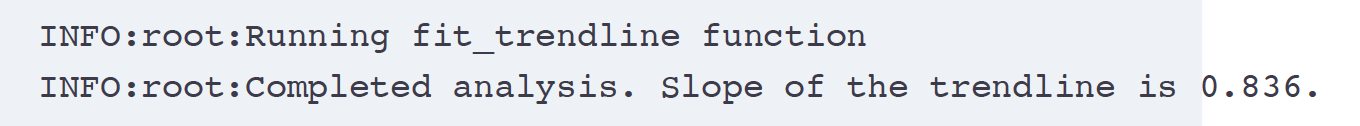

ログにタイムスタンプを追加することは、特定のコード行を実行した時刻を知るのに役立ち、後で簡単に検索するためにも便利です。format 引数で、時間の記録設定で行うことができます。

In [ ]:
logging.basicConfig(
    filename="chapter_5_logs.log",
    level=logging.DEBUG,
    format='%(asctime)s %(message)s'
)


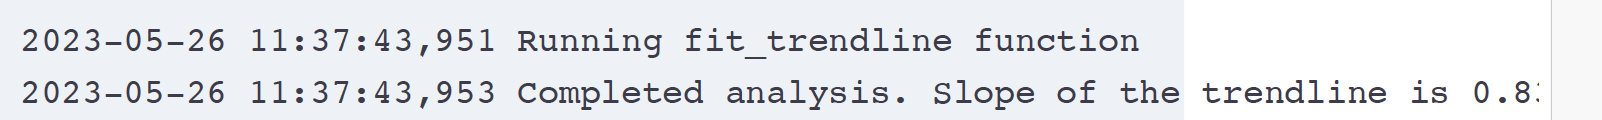

次のように　logging.exception を使います。

In [ ]:
def fit_trendline(year_timestamps, data):
    logging.info("Running fit_trendline function")
    try:
        result = linregress(year_timestamps, data)
    except TypeError as e:
        logging.error("Both lists must contain floats or integers.")
        logging.exception(e)
    else:
        slope = round(result.slope, 3)
        r_squared = round(result.rvalue**2, 3)
        logging.info(f"Completed analysis. Slope of the trendline is {slope}.")
        return slope, r_squared


logging.exception では、ログにトレースバック全体を記録します。

これは非常に便利です。後でデバッグに使用できるからです。

#### Tip

Jupyterノートブックでloggingモジュールを使用することができます。これにより、結果をログファイルに保存でき、ノートブックを再実行する必要がなくなります。結果をコピーしてMarkdownセルに貼り付けるよりも良い選択肢かもしれませんが、管理するファイルが増えることになります。また、私が説明しているような実験管理ソリューションを使用することもできます。

## デバッグ

デバッグとは、コード内のバグを見つけて取り除くことを意味します。バグとは、コードが予期しないエラーを投げたり、期待しない結果を出したりすることです。デバッグはコードを書く上で重要なスキルであり、大規模なコードベースを扱う際には状況に応じた様々なテクニックを持っておくことが必要です。このセクションでは、バグを見つけるためのいくつかの戦略を説明し、その後デバッグに使えるツールを紹介します。

デバッグのストラテジー

バグのあるコードに関する情報を得る私の好きな方法は、そのバグのあるコードを実行し、その上で試行錯誤することです。（print文を追加したり、微小な変更を加えたり！）。

—ジュリア・エバンズ

経験を積むにつれて、難しいバグを見つけるための自分のお気に入りの戦略が生まれるでしょう。しかし、ジュリア・エバンスの引用で推奨されているように、素晴らしい出発点はデータサイエンティストが得意とすること、すなわち実験を行うことです。コードに小さな変更を加え、その結果にどのように影響するかを確認しますが、一度に一つだけを変更するように注意してください。

ここでこれをカバーしますが、テストは非常に役立ちます。テストは、行った変更がコードから期待する結果を生み出すかどうか（テストが合格する）を教えてくれます。期待しない場合は（テストが失敗する）そうではありません。

もう一つの重要なポイントは、エラーの原因となったもの、たとえば関数への入力や特定のデータベースクエリの結果を保存しておくことです。ここでロギングが非常に役立ちます。なぜなら、何が起きたのかを記録として残すことができるからです。

あなたがエラーメッセージを引き起こしている間違いを犯した最初の人ではない可能性も高いです。問題を解決するための豊富な情報がインターネット上にあります。エラーメッセージをGoogleで検索することは素晴らしい出発点です。

自分のコードについて他の人と話すことは、バグを見つけるためのもう一つの優れた戦略です。チームメイトに説明したり、ラバーダック相手に声に出して話したりすることで、コードをただ見るだけとは違った視点で考えることができ、解決策を見つけることができるかもしれません。また、他の人は自分の経験を共有して、あなたを助けてくれることもあります。

誰もが自分のコードにバグを抱えており、すべての職場文化がこれを奨励するわけではありませんが、何かを知らないとかミスをしたとかを言うことは許容されるべきです。私も確かに多くのバグを含んだコードを書いています。中には微妙で見つけにくいものもあれば、シンプルだけれども追跡するのにイライラするものもあります。この本を書いている最中にも、オンライン版でコードに間違いを見つけたと誰かがすでにメールで知らせてくれました。

コーディングから離れて休憩を取ることも、優れたデバッグ戦略の一つです。お茶を入れたり、散歩に出かけたり、他のことに取り組んだりしてみましょう。まったく別のことをしている間に、解決策がひらめくかもしれません。

新しい視点でコードに戻るとき。休憩を取ることで、バグの原因として考えられるさまざまな可能性を思いつくのにも役立ちます。

ときにはコードを詳細に掘り下げる必要がありますが、次のセクションのツールが非常に役立ちます。

### デバッグのツール

デバッグツールは、コード内で何が起こっているのかを正確に追跡する手助けをします。コード内で名前付き変数に関連付けられた値に関する情報を得ることができれば、そのコードが想定通りの動作をしているかどうか確認するのに非常に有用です。最もシンプルな方法は コードにprint 文を追加することです。

デバッグツールを使用すると、print より多くの情報を取得できます。
これらのツールは、コードを一時停止させ、特定の変数の値を表示し、そのコードを一歩ずつ進める方法を提供します。

これから、第２章のコード例を使って説明します。

In [16]:
def weighted_mean(num_list, weights):
    running_total = 0
    for i in range(len(num_list)):
        running_total += (num_list[i] * weights[0])
        print(f"The running total at step {i} is {running_total}")
    return (running_total / len(num_list))

この関数を実行すると、次の出力が得られます。

In [17]:
print(weighted_mean([1, 6, 8], [1, 3, 2]))

The running total at step 0 is 1
The running total at step 1 is 7
The running total at step 2 is 15
5.0


これは、実行中の合計が正しく計算されていないことを示しています。ステップ1では19、ステップ2では35であるべきです。

しかし、コードに print を散らかすことはベストプラクティスではありません。

これにより、コードの結果を見つけるのが難しくなります。また、コードが本番環境で実行されている場合、出力にアクセスできない可能性があります。

別の選択肢として、「ロギング」で説明されているように、コードの中間値を記録する方法があります。こちらがその例です。

In [19]:
import logging

logging.basicConfig(
    filename="chapter_5_logs.log",
    level=logging.DEBUG,
    format='%(asctime)s %(message)s'
)

def weighted_mean(num_list, weights):
    running_total = 0
    for i in range(len(num_list)):
        running_total += (num_list[i] * weights[0])
        logging.debug(f"The running total at step {i} is {running_total}")
    return (running_total / len(num_list))


In [20]:
print(weighted_mean([1, 6, 8], [1, 3, 2]))

5.0


この出力は別のファイルに保存されるため、これを本番システムでアクセスすることができます。

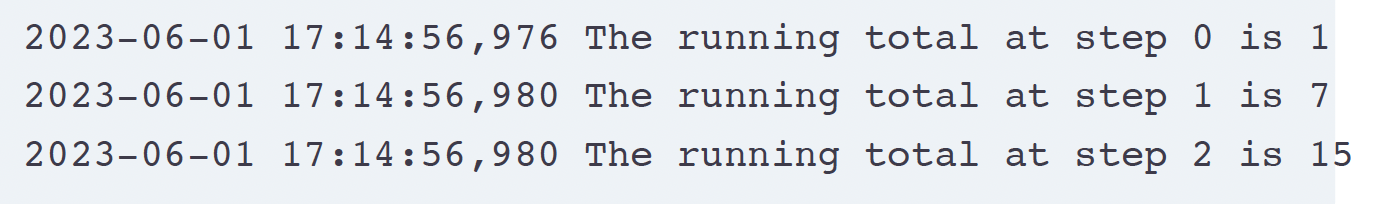

このような小さなプログラムではステートメントやログ記録が十分かもしれませんが、関数内に変数が十数個ある場合はどうでしょうか？記録したい変数のいくつかが大きな辞書であった場合はどうでしょう？このような状況がすぐに扱いにくくなることは容易に想像できます。幸いにも、これはソフトウェアエンジニアがしばしば直面する問題であり、このような状況で役立つ一連のツール（デバッガ）があります。

デバッガーはブレークポイントの概念を使用します。ブレークポイントとは、コードの実行を一時停止して、変数の状態（もしくは保存されたファイルやデータベース）を確認したい場所を選択するポイントです。これにより、すべてが正しいかどうかを確認できます。

期待する内容であれば、その後コードをステップ実行して変数がどのように変化するかを確認します。これにより、バグの原因を見つける手助けになります。

統合開発環境には一般的にデバッガが含まれています。ここでは、VS Codeのデバッガを使ってその使用方法を説明しますが、他のIDEでも非常に似ています。

次の例では、次の実行可能なスクリプトをデバッグする方法をお見せします。

In [21]:
def weighted_mean(num_list, weights):
    running_total = 0
    for i in range(len(num_list)):
        running_total += (num_list[i] * weights[0])
    return (running_total / len(num_list))

weighted_mean([1, 6, 8], [1, 3, 2])

5.0

for 文の中の、running_totarl += .. の行にブレークポイントを追加します。

デバッガを使用すると、関数内の任意の時点で各変数が何であるかを簡単にステップ実行できます。ループ内の各ステップでの変更点をハイライト表示します。

図5-2はループの最初のイテレーションを示しています。

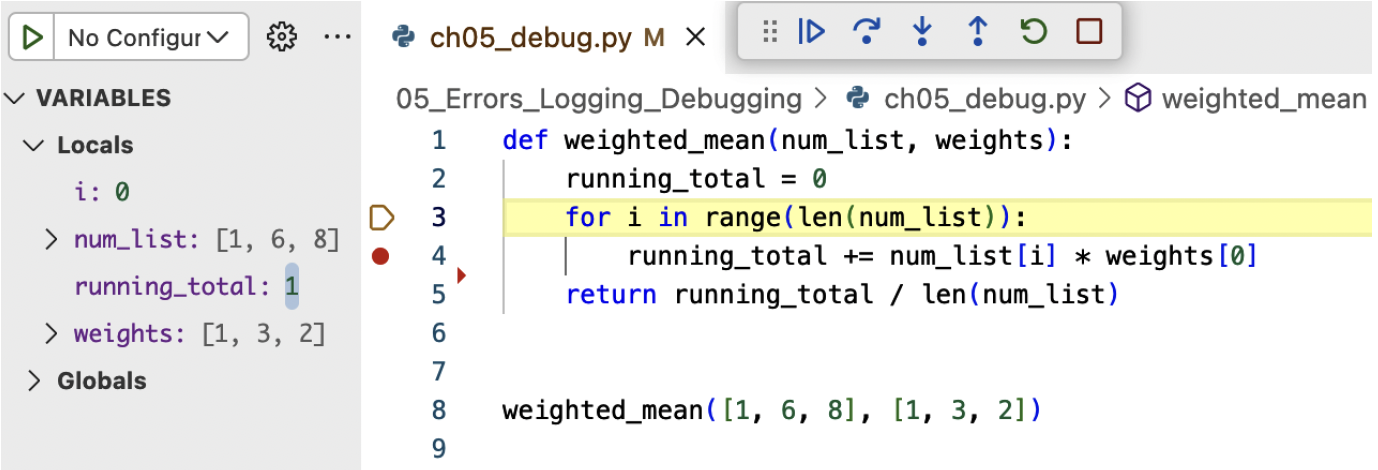

図5-2.IDEデバッガで変数を表示、反復1

デバッガーは、値が1であることを示していますが、その値がどうなっているかが不明です。

次に、コードの行を進めていき、値が1になる2回目の反復を見てみます。図5-3でわかるように、この時点での累計が間違っています。正しくは(1 * 1) + (3 * 6) = 19のはずですが、実際には7になっています。

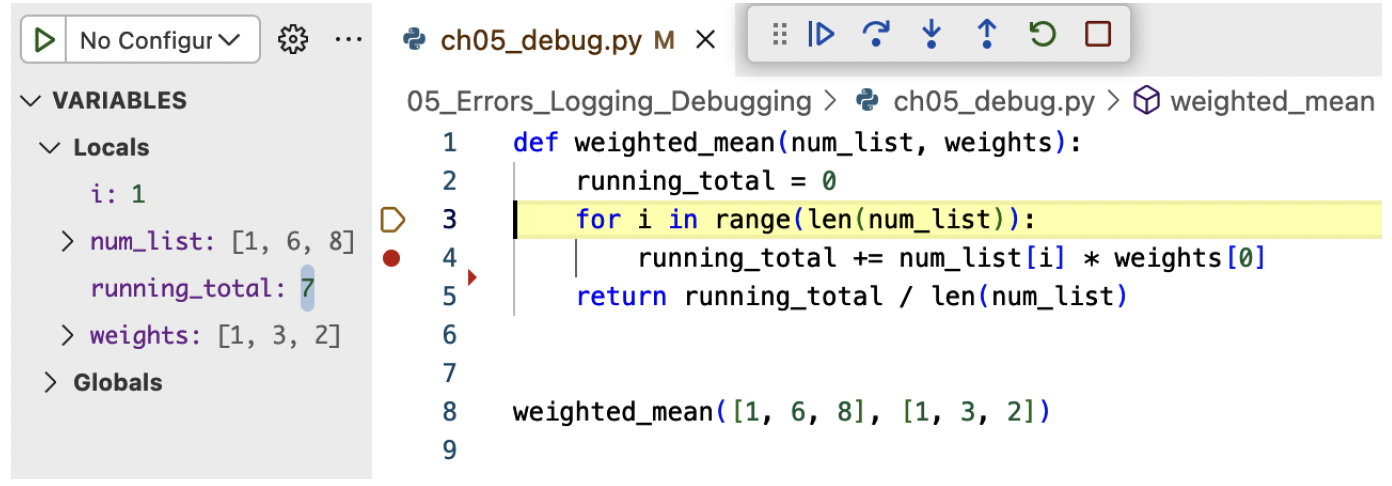

Figure 5-3. IDEデバッガ内の変数表示、イテレーション2（注：値は

変更されました)

バグは関数の4行目にあります。こちらが修正された行です：
```python
        running_total += (num_list[i] * weights[i])

```

デバッガの使用方法の詳細は、使用しているIDEによって異なりますが、すべてに類似した機能があります。詳細は、IDEのドキュメントやヘルプセクションを参照してください。

IDEでJupyterノートブックを実行している場合は、図5-4に示すようにデバッグ機能を使用することもできます。

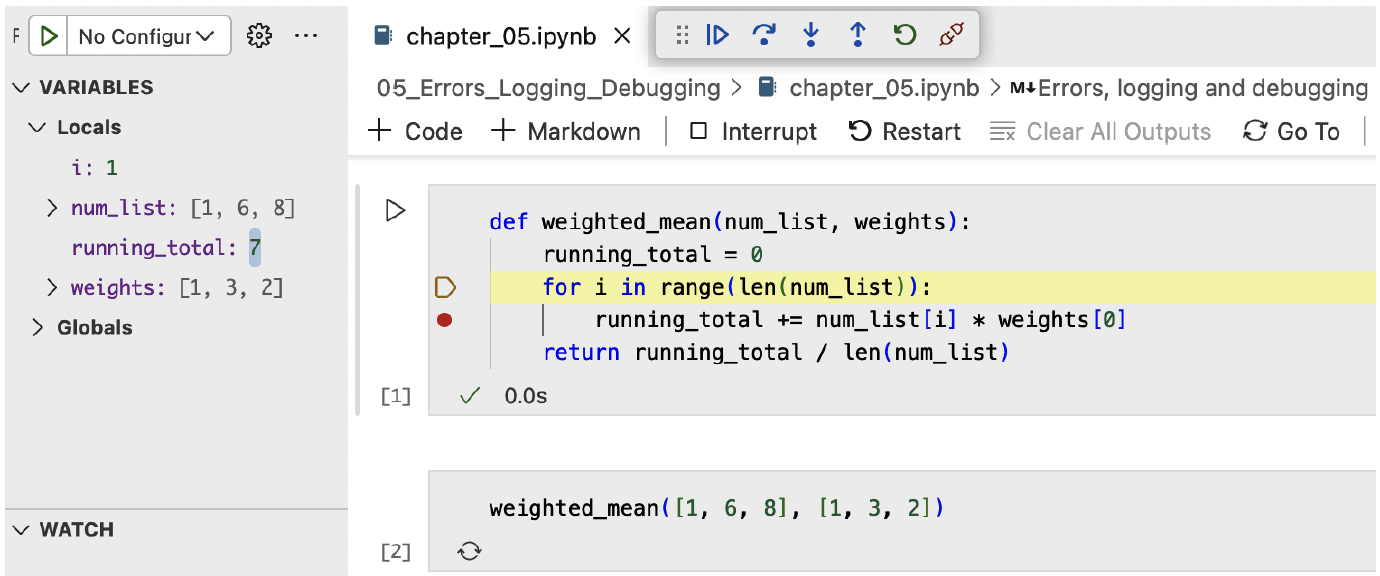

図5-4. IDEでノートブックをデバッグする

スタンドアロンのスクリプトと同じ方法で、簡単にブレークポイントを追加できます。

IDEを使用していなくても、デバッガーを使用することができます。

Python標準ライブラリに含まれているコマンドラインデバッガーは「pdb」です。

使用するには、次のようにコードにメソッドを追加します。

In [22]:
import pdb
def weighted_mean(num_list, weights):
    running_total = 0
    for i in range(len(num_list)):
        running_total += (num_list[i] * weights[0])
        breakpoint()
    return (running_total / len(num_list))

weighted_mean([1, 6, 8], [1, 3, 2])


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



> /tmp/ipython-input-22-1796070307.py(4)weighted_mean()
      2 def weighted_mean(num_list, weights):
      3     running_total = 0
----> 4     for i in range(len(num_list)):
      5         running_total += (num_list[i] * weights[0])
      6         breakpoint()

ipdb> p running_total
1
ipdb> p weights
[1, 3, 2]
ipdb> n
> /tmp/ipython-input-22-1796070307.py(5)weighted_mean()
      3     running_total = 0
      4     for i in range(len(num_list)):
----> 5         running_total += (num_list[i] * weights[0])
      6         breakpoint()
      7     return (running_total / len(num_list))

ipdb> n
> /tmp/ipython-input-22-1796070307.py(6)weighted_mean()
      4     for i in range(len(num_list)):
      5         running_total += (num_list[i] * weights[0])
----> 6         breakpoint()
      7     return (running_total / len(num_list))
      8 

ipdb> n
> /tmp/ipython-input-22-1796070307.py(4)weighted_mean()
      2 def weighted_mean(num_list, weights):
      3     running_total = 0
----> 4   


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/bdb.py", line 361, in set_quit
    sys.settrace(None)



次に、通常通りスクリプトを実行してください。

コードはブレークポイントに到達するまで実行され、その後pdbデバッガーが開かれ、次のような出力が表示されます。

任意の変数の値を表示するには、`p variable_name`を使用します。

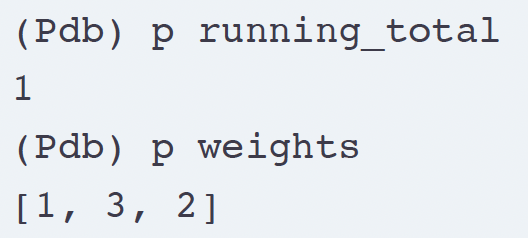

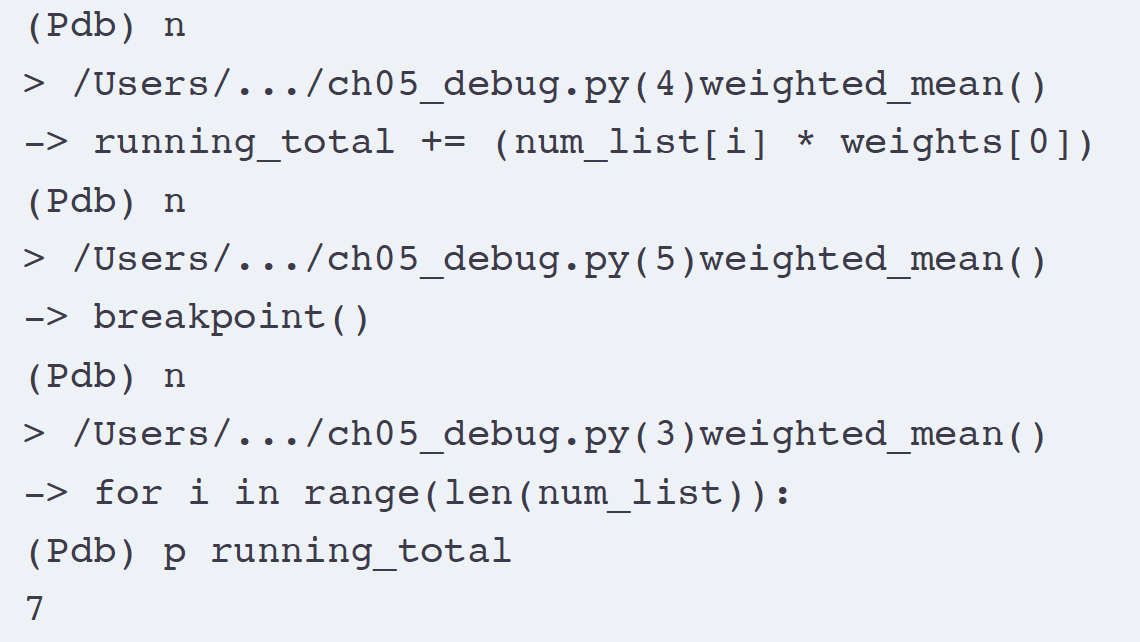

完了したら、qを使ってデバッグを停止することができます。これによりスクリプトが終了します。

pdbの使用が終わったら、コードを確認し

すべての呼び出しを削除してください。そうしないと、毎回pdbが開始されることになります。

表5-2には、pdbのコマンドショートカットが示されています。

表5-2. pdbコマンド

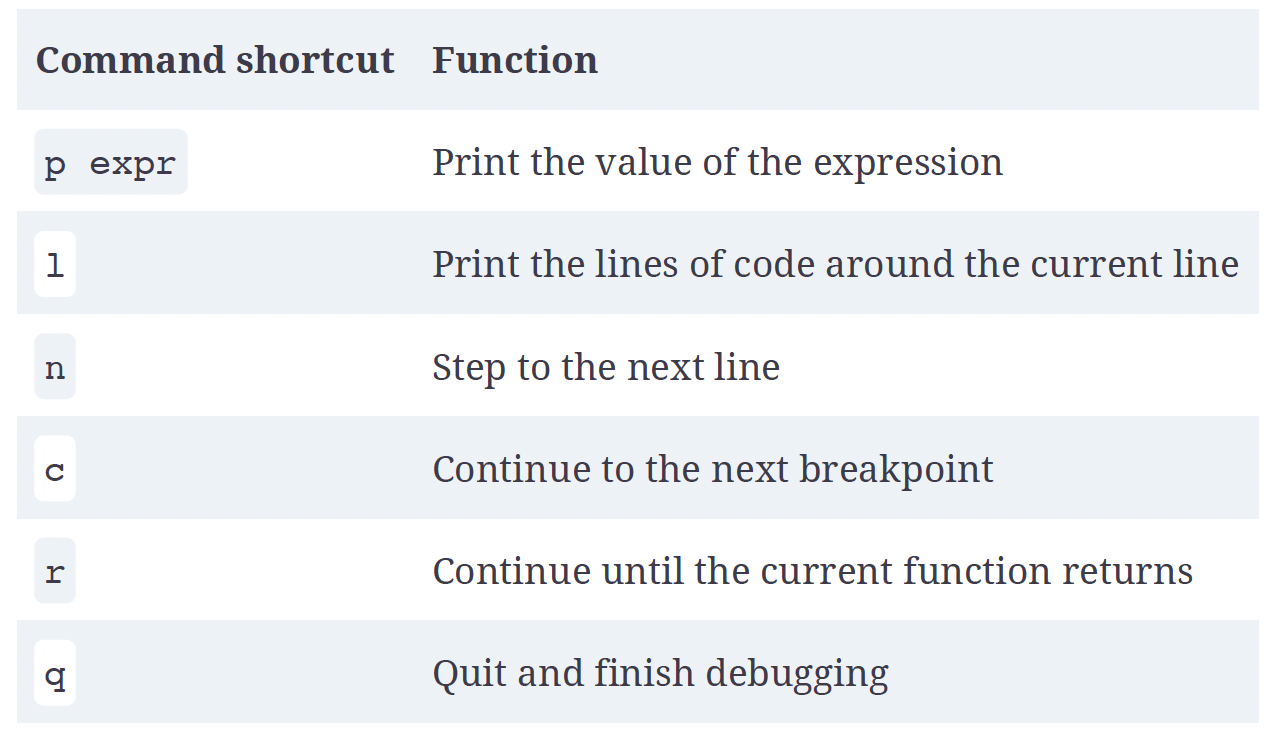

pdbは、IDEのデバッガーと同じ機能を提供しますが、状況に応じて適したツールを使用できるように、異なるツールをいくつか知っておくと良いです。IDEでコードを開発している場合には、そこに含まれているデバッガーを使うのが最も簡単ですが、コマンドラインでスクリプトを実行する場合には、pdbの方が適しています。

## この章の重要ポイント

この章では、コードをより堅牢にする方法について説明しました。また、ログを記録することでコードが読みやすくなることもあります。さらに、コード内の問題を見つけて解決するためのスキルについても簡単に説明しました。

エラーの適切な処理は、予期しない入力に対してコードを堅牢に保つために重要であり、必要に応じてカスタムエラーを自分で発生させるべきです。

ログは、コードが実行した内容の記録を保存するものであり、特に本番コードや長時間実行されるスクリプトにとって非常に便利です。Pythonの組み込みモジュールである「logging」には、必要なすべての機能が含まれています。

追跡のための様々な戦略やツールを持つことは非常に有用です。

コードからバグを取り除く。デバッグツールは、最先端の技術から...

ログを通じて特定のデバッグツールにメントし、さらにデバッグにテストをどのように利用できるかについてもお話しします。